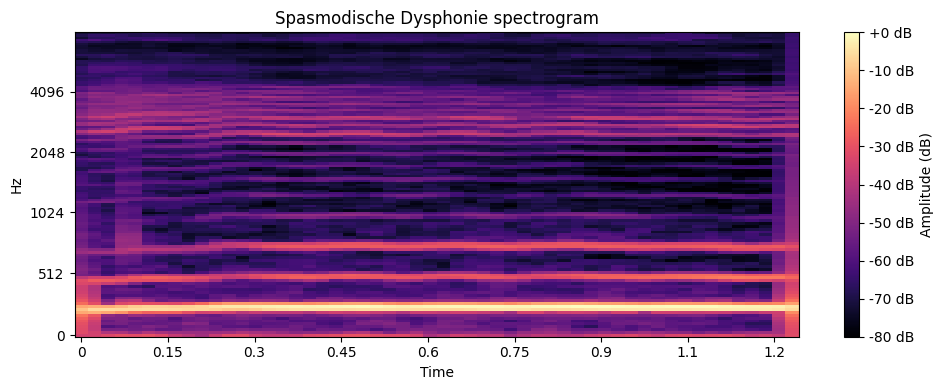

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Set the path to your audio file ---
audio_file = r'VoiceDS_SHR\spasmodische_dysphonie\665-i_h.wav' # <-- IMPORTANT: Replace this with your file path

# --- 2. Load the audio file ---
# y is the audio time series, sr is the sampling rate
try:
    y, sr = librosa.load(audio_file)
except FileNotFoundError:
    print(f"Error: The file '{audio_file}' was not found.")
    print("Please make sure the file path is correct.")
    exit()

# --- 3. Compute the Mel spectrogram ---
# A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale.
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# --- 4. Convert power spectrogram to decibels (dB) ---
# This makes the visualization more intuitive, as human perception of loudness is logarithmic.
S_dB = librosa.power_to_db(S, ref=np.max)

# --- 5. Create the plot ---
fig, ax = plt.subplots(figsize=(10, 4))

# Use specshow to display the mel-spectrogram.
# x_axis='time' and y_axis='mel' correctly label the axes.
img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', ax=ax, fmax=8000, cmap='magma')

# Add a color bar to the side of the plot to show the dB scale
fig.colorbar(img, ax=ax, format='%+2.0f dB', label='Amplitude (dB)')

# Set the title of the plot
ax.set(title="Spasmodische Dysphonie spectrogram")

# Ensure the layout is tight
plt.tight_layout()

# Display the plot
plt.show()